In [22]:
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [2]:
flightData = pd.read_csv("./HuntsvilleTeleMetrumRaw.csv")

In [3]:
flightDataEasy = pd.read_csv("./EasyMiniHuntsvilleRawData.csv")

In [4]:
ORData = pd.read_csv("./OR_Flight.csv")

In [5]:
OR15Data = pd.read_csv("./OR15.csv")

In [6]:
rho = 1.225 #kg/m^3
rocketDia = 0.1524 #m
rocketMass = 17 #kg
Apo = 2000 #m
burnOut = 257.78 #m
g = 9.81 #m/s^2


vCross = 10

Hconst = 10000

CdRocket = 0.6

def Cd(v):
    return CdRocket#*(1-.1*(v/200))

def k(y,v):
    return 1/2*rho*np.exp(-y/Hconst)*np.pi/4*(rocketDia)**2*Cd(v)

def dVdy(y,v):
    return -k(y,v)/rocketMass*np.sqrt(v**2+vCross**2)*np.sign(v) - g/v

In [7]:
y_span = [burnOut, Apo-0.001]
vInitial = np.array([200.25*np.cos(8*np.pi/180)]) #m/s
y_eval = np.arange(burnOut,Apo,2)

In [8]:
vCross = 0
CdRocket = 0.6
rocketMass = 15.5
solutionVert = spint.solve_ivp(dVdy,y_span,vInitial,t_eval=y_eval)

In [9]:
vCross = 0
CdRocket = 0.6
rocketMass = 15.5
solutionCross = spint.solve_ivp(dVdy,y_span,vInitial,t_eval=y_eval)

Text(0, 0.5, 'Velocity (m/s)')

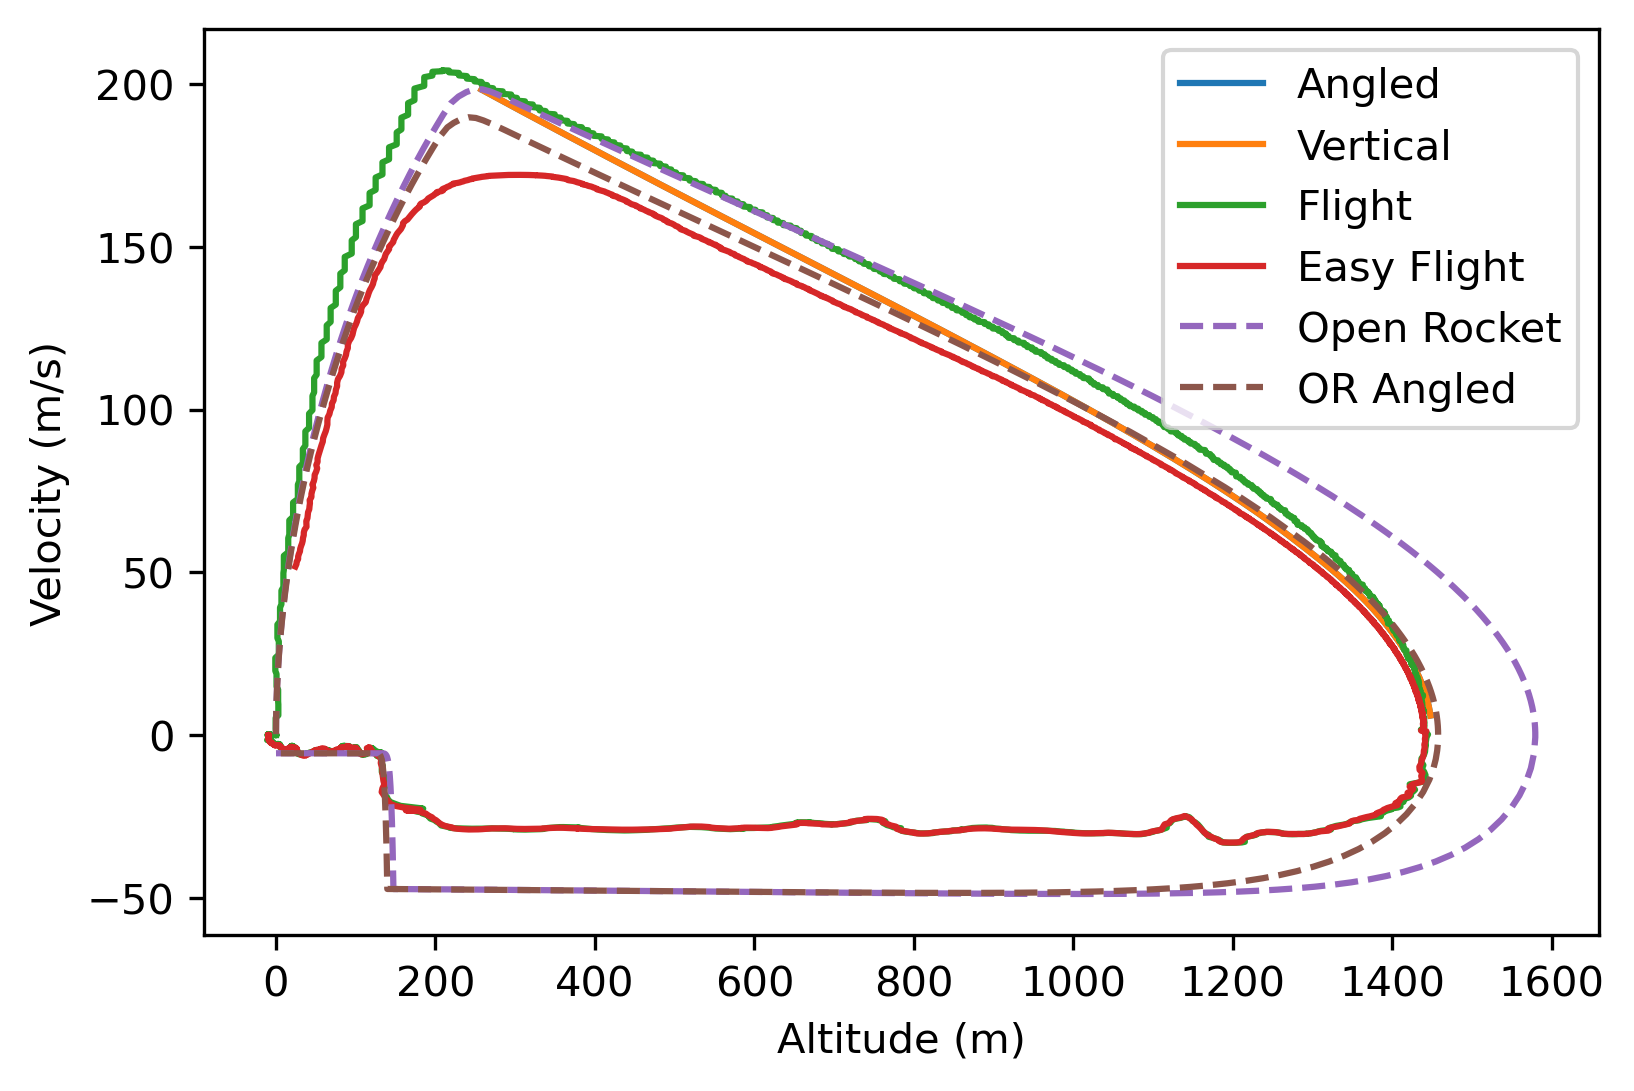

In [10]:
plt.figure(dpi=300)
plt.plot(solutionCross.t,solutionCross.y.T)
plt.plot(solutionVert.t,solutionVert.y.T)
plt.plot(flightData["height"],flightData["speed"])
plt.plot(flightDataEasy["height"],flightDataEasy["speed"])
plt.plot(ORData["Altitude (m)"],ORData["Vertical velocity (m/s)"],"--")
plt.plot(OR15Data["Altitude (m)"],OR15Data["Vertical velocity (m/s)"],"--")
plt.legend(["Angled","Vertical","Flight","Easy Flight","Open Rocket","OR Angled"],loc="best")
plt.xlabel("Altitude (m)")
plt.ylabel("Velocity (m/s)")

In [11]:
def vlt(y,k,m,Apo):
    numerator = np.sqrt((-1+np.exp(2*k*(Apo-y)/m))*g*m)
    return numerator/np.sqrt(k)

In [39]:
fittingDataX = flightDataEasy[(flightDataEasy['speed']>1) & (flightDataEasy['height']>400)]['height']
fittingDataY = flightDataEasy[(flightDataEasy['speed']>1) & (flightDataEasy['height']>400)]['speed']

In [40]:
# fittingDataX = flightData[(flightData['speed']>1) & (flightData['height']>400)]['height']
# fittingDataY = flightData[(flightData['speed']>1) & (flightData['height']>400)]['speed']

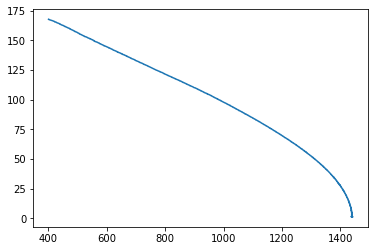

In [41]:
plt.plot(fittingDataX,fittingDataY)

In [42]:
popt, pcov = opt.curve_fit(vlt,fittingDataX,fittingDataY,[k(500,100),15,1450])

C:\Users\trevg\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-11-a27169340fac>:3: RuntimeWarning: invalid value encountered in sqrt
  return numerator/np.sqrt(k)


In [43]:
popt

array([5.57628667e-03, 1.67698000e+01, 1.44271000e+03])

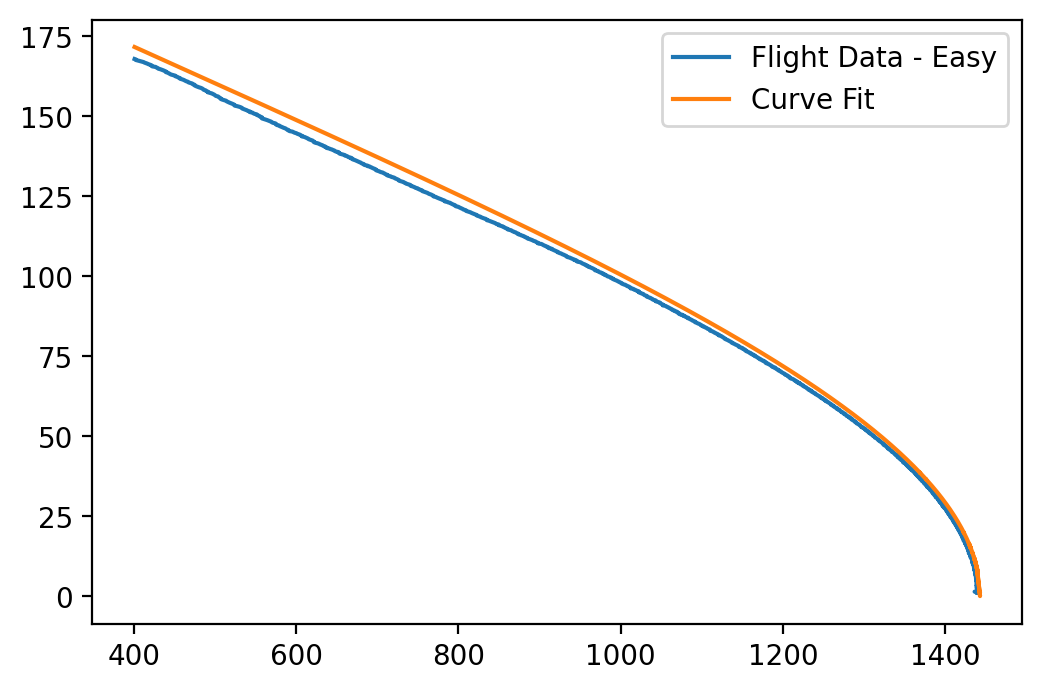

In [49]:
plt.figure(dpi=200)
plt.plot(fittingDataX,fittingDataY)
plt.plot(fittingDataX,vlt(fittingDataX,*(popt)))
plt.legend(["Flight Data - Easy","Curve Fit"])